# Control Mappings

In this notebook, two different approaches to generating mappings that serve as a kind of negative controls will be used. Please make sure that you have run the [Mapping notebook](2_mapping.ipynb) before executing this one.

In [1]:
import nabo

## Approach number one
 In the first approach the target sample will be mapped onto the reference graph generated in [Mapping notebook](2_mapping.ipynb), but the target cells are prohibited from projecting onto reference cells that received a high score. To do this, we first load the graph saved at the end of [Mapping notebook](2_mapping.ipynb) using the [load_from_gml](../../../api.rst#nabo.Graph.load_from_gml) method. Next, we save the names of reference nodes with a high score (here we set a threshold of 1 using `min_score`) into a variable (`high_score_ref_nodes` here). Next, we instantiate a `mapping` object as done in [Mapping notebook](2_mapping.ipynb) but do not call the [make_ref_graph](../../../api.rst#nabo.Mapping.make_ref_graph) method. Instead we proceed directly to the [map_target](../../../api.rst#nabo.Mapping.map_target) method. Here we provide a label `MEnull` to this target projection and we provide an extra parameter `ignore_ref_cells` with value `high_score_ref_nodes`. This mapping is loaded into the graph, which can be visualized as before. Lastly, we plot the distribution of mapping scores for each cluster, as well as plot the number of target cells predicted from each cluster.

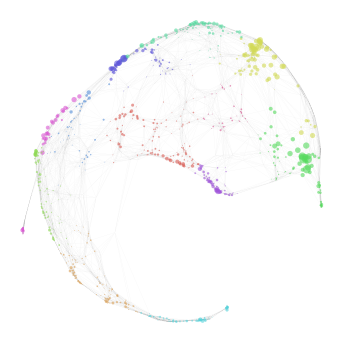

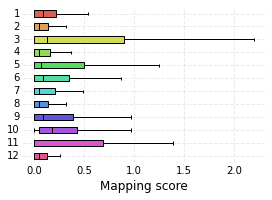

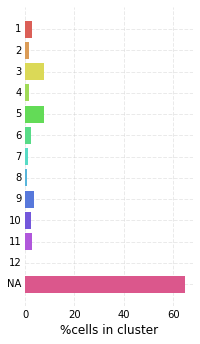

In [2]:
hvg_graph = nabo.Graph()
hvg_graph.load_from_gml('../analysis_data/hvg_graph.gml')
high_score_ref_nodes = hvg_graph.get_mapping_score(
    'ME', min_score=1, sorted_names_only=True, remove_suffix=True)
mapping = nabo.Mapping('../analysis_data/mapping.h5', 'WT',
                       '../analysis_data/hvg_pca_WT.h5', 'data')
mapping.set_parameters(15, 11, 0.25, 500)
mapping.map_target('MEnull', '../analysis_data/hvg_pca_ME.h5',
                   'data', ignore_ref_cells=high_score_ref_nodes,
                  overwrite=True)
hvg_graph.load_from_h5('../analysis_data/mapping.h5', 'MEnull', 'target')

null_mapping_score = hvg_graph.get_mapping_score('MEnull')
nabo.GraphPlot(hvg_graph, vc_attr='cluster', vs=null_mapping_score)

me_null_cluster_scores = hvg_graph.get_mapping_score('MEnull')
nabo.plot_cluster_scores(me_null_cluster_scores, clusters=hvg_graph.clusters)
me_null_target_clusters = hvg_graph.classify_target('MEnull')
nabo.plot_target_class_counts(me_null_target_clusters, ref_values=hvg_graph.clusters, sort=False)

## Approach number two
 In the second approach, the mapping is performed using PCA dimensions created using low variance genes (LVG) in the [Preprocessing notebook](1_preprocessing.ipynb).
We essentially take the same steps as we did there. We change the output filename to `lvg_mapping.h5` and the name of the input reference file to `lvg_pca_WT.h5`. The name of the input file for MLL-ENL target sample is changed to `lvg_pca_ME.h5`. We keep the same parameter values as before. Note that unlike the previous approach we _do_ create a new reference graph here. We then create a new graph (called `lvg_graph` here) and load these mappings on it. We import the cluster information from `hvg_graph` as well as the graph layout, to allow for easy visual comparison. It should be noted that an LVG graph can have a different set of edges than a HVG graph.

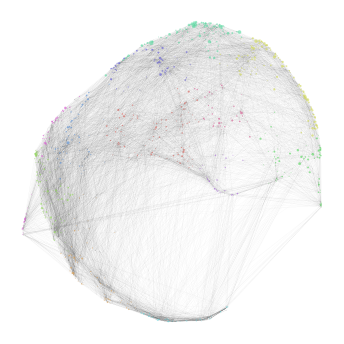

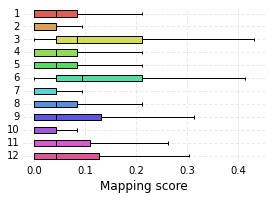

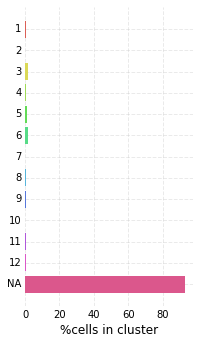

In [3]:
lvg_mapping = nabo.Mapping('../analysis_data/lvg_mapping.h5', 'WT',
                           '../analysis_data/lvg_pca_WT.h5', 'data')
lvg_mapping.set_parameters(15, 11, 0.25, 500)
lvg_mapping.make_ref_graph()
lvg_mapping.map_target('ME', '../analysis_data/lvg_pca_ME.h5', 'data',
                      overwrite=True)
lvg_graph = nabo.Graph()
lvg_graph.load_from_h5('../analysis_data/lvg_mapping.h5', 'WT', 'reference')
lvg_graph.load_from_h5('../analysis_data/lvg_mapping.h5', 'ME', 'target')

lvg_graph.import_clusters(hvg_graph.clusters)
lvg_graph.import_layout(hvg_graph.refG.layout)

lvg_mapping_score = lvg_graph.get_mapping_score('ME')
nabo.GraphPlot(lvg_graph, vc_attr='cluster', vs=lvg_mapping_score)

lvg_cluster_scores = lvg_graph.get_mapping_score('ME')
nabo.plot_cluster_scores(lvg_cluster_scores, clusters=lvg_graph.clusters)
lvg_target_clusters = lvg_graph.classify_target('ME')
nabo.plot_target_class_counts(lvg_target_clusters, ref_values=lvg_graph.clusters, sort=False)
lvg_graph.save_graph('../analysis_data/lvg_graph.gml')